# Defining the problem

The dataset contains the data of Health Related Parameters of a customers of a insurance company. few people  whether they have a certain medical condition or not, if they have gone through any surgery previously, their age, height and weight.

Based on all this conditions a person pays different amount of Medical Insurance Premium, which is also present in the dataset.

From this data, we have to analyze, what factors and what medical conditions is affecting or varying the premium amount. Also by further exploring, we can alanyze the impact of a persons age and weight on the different conditions occured.

#  Questions we need to answer

How much of an effect does age have on premium?<br><br>
Does any previous major surgeries or organ transplants have an effect on premium?<br><br>
People having other medical conditions like Diabetes, Allergies, Bloodpressure, ChronicDisease is affecting the premium ammount.<br><br>
Does people having cancer in family history is also affecting the premium?<br><br>
How height and weight of a person effects the premium?<br><br>

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Medicalpremium.csv')

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# Exploratory Data Analysis

In [4]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## Checking for Null Values

In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

## EDA on responce variable

<AxesSubplot:xlabel='PremiumPrice', ylabel='Count'>

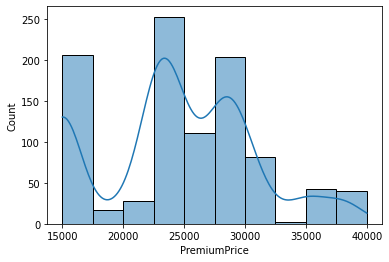

In [6]:
sns.histplot(data=df, x='PremiumPrice',bins=10, kde=True )

the responce variable PremiumPrice is not normally distributed, we might need to apply some transformation techniques on premium price when building models.

## EDA on Quantitative variables

### Correlation Map

<AxesSubplot:>

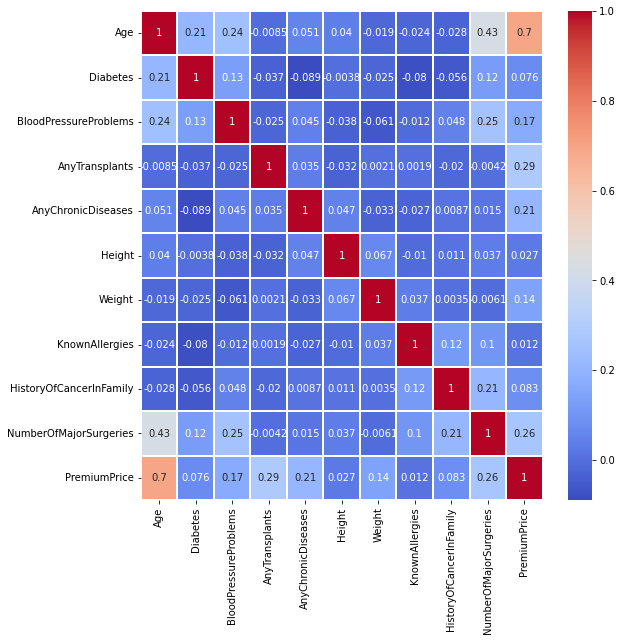

In [7]:
plt.figure(figsize=(9,9))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True,linewidths=0.1)

•	Premium Price is highly influenced by Age of the customer, Correlation coefficient is +0.71 shows very high positive relationship. <br><br>
•	Premium Price shows very low correlation with few variables which should be ignored or remodeled when creating the model.<br>


### Age

<AxesSubplot:xlabel='Age', ylabel='PremiumPrice'>

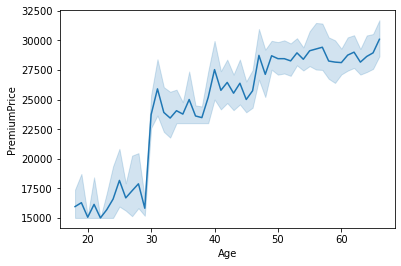

In [8]:
sns.lineplot(x=df.Age,y=df.PremiumPrice)

### Height

<AxesSubplot:xlabel='Height', ylabel='PremiumPrice'>

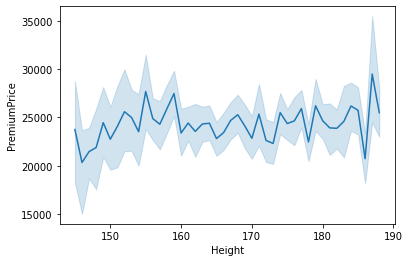

In [9]:
sns.lineplot(x=df.Height,y=df.PremiumPrice)

### Weight

<AxesSubplot:xlabel='Weight', ylabel='PremiumPrice'>

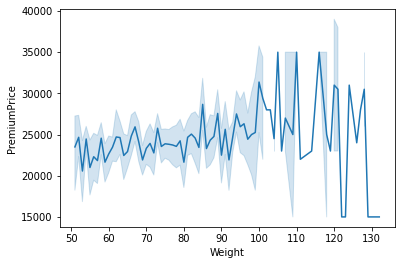

In [10]:
sns.lineplot(x=df.Weight,y=df.PremiumPrice)

It's quite clear from the scatterplot that we don’t see any specific pattern which neither indicates positive nor negative relationship between height and weight.<br><br>
Can barely see any positive or negative relationship for height and weight with premium price too. So, it's better to ignore this variable or create a new variable like BMI using these variables such that it has an impact on the premium price. 


## EDA on Qualitative variables

In [11]:
Categorical_Variables = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases','KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

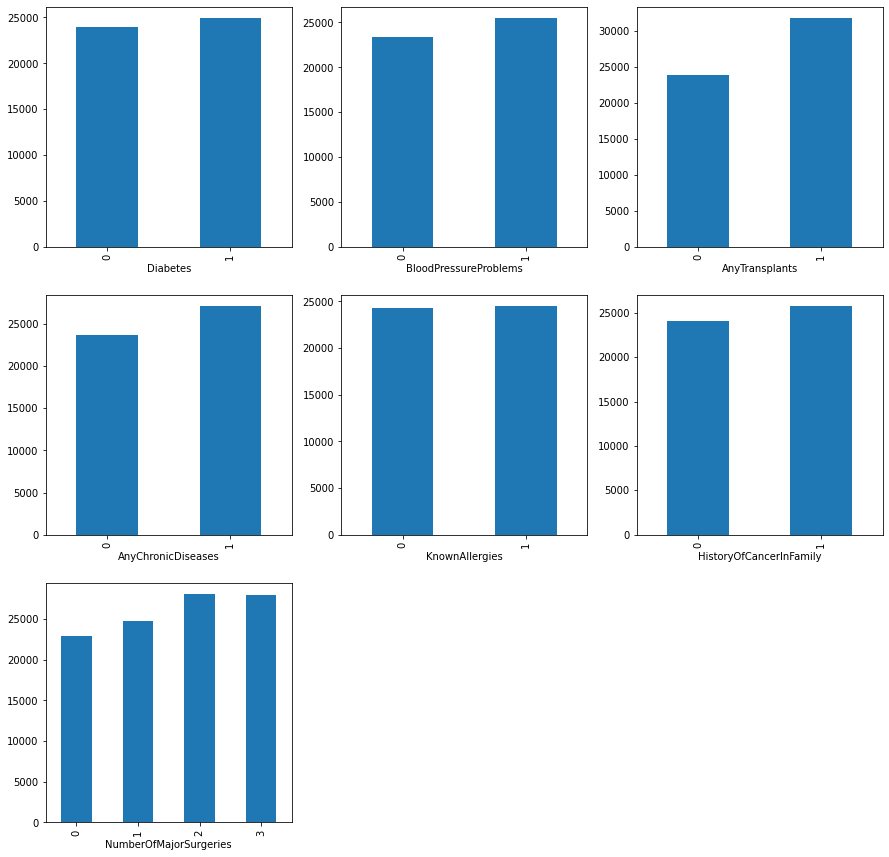

In [12]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    df.groupby(feature)['PremiumPrice'].mean().plot.bar()
    c=c+1
    
plt.show()

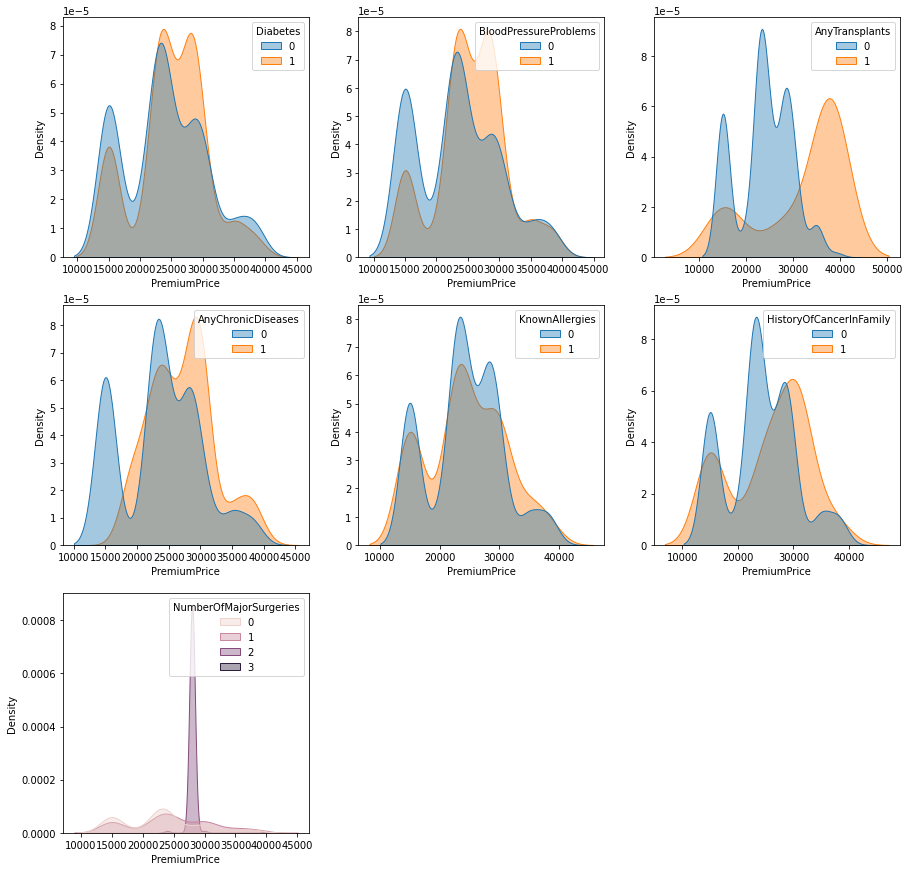

In [13]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    sns.kdeplot(x='PremiumPrice', data=df, hue=feature, fill=True, common_norm=False, 
                alpha =0.4, warn_singular=False)
    c=c+1
    
plt.show()

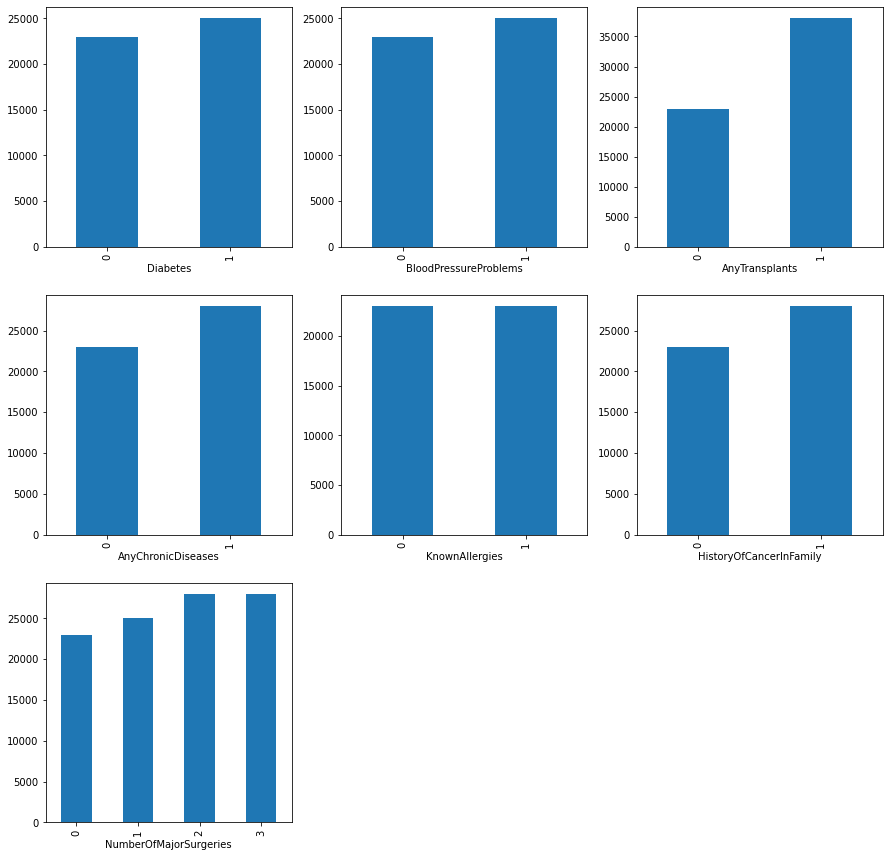

In [14]:
plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1

for feature in Categorical_Variables:
    plt.subplot(a,b,c)
    df.groupby(feature)['PremiumPrice'].median().plot.bar()
    c=c+1
    
plt.show()

according to the above 2 graphs we can clearly see that variables like <b>"AnyTransplants" ,"AnyChronicDiseases" ,"HistoryOfCancerInFamily" and "NumberOfMajorSurgeries"</b> has an significant impact on premium price, other variables doesn't seem to have any significant impact on the premium though.

## Creating new variables

As discussed earlier, weight and height doesn’t seem to have a big effect on the premium price. So, creating new variable BMI using these variables might have an impact on the premium price. 

It's quite hard to come up with a conclusion using only the BMI value.  therefore, assigning people to one of the below categories according to their BMI value and analyzing them might give us a good insight. <br><br>
•	 BMI less than 18.5, falls within the underweight range.<br>
•	 BMI 18.5 to <25, falls within the normal weight range.<br>
•	 BMI 25.0 to <30, falls within the overweight range.<br>
•	 BMI 30.0 or higher, falls within the obesity range<br>


In [15]:
df['BMI'] = df.Weight.values/(((df.Height).values/100)**2)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [16]:
under_index = df[df.BMI<18.4999].index
normal_index = df[(df.BMI>18.5) & (df.BMI<24.9999)].index
over_index = df[(df.BMI>25) & (df.BMI<29.9999)].index
obecity_index = df[df.BMI>30].index

df.loc[under_index,'BMI_Status'] = 'Under Weight'
df.loc[normal_index,'BMI_Status'] = 'Normal'
df.loc[over_index,'BMI_Status'] = 'Over Weight'
df.loc[obecity_index,'BMI_Status'] = 'Obecity'

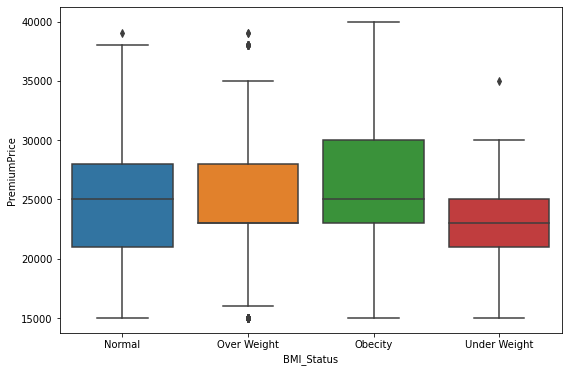

In [17]:
plt.figure(figsize=(9,6))
ax = sns.boxplot(x='BMI_Status', y='PremiumPrice', data=df)

According to above plots, People who are with <b>obesity and overweight</b> problems likely to have higher premium prices.  